In [35]:
## 定义一个线程模型
import numpy as np

class LinearModel:
    def __init__(self,W,b):
        self.W = W
        self.b = b
        
    def forward(self,x):
        ## y = w1x1^2 + w2x + d
        x = np.column_stack((x, x*x))
        #print(x)
        y = np.dot(x,W) + self.b
        return y
        
    def loss(self,x,y):
        return np.sqrt(np.mean((y - self.forward(x))** 2))
        
    def backward(self,x,y):
        x = np.column_stack((x, x*x))
        d = np.dot(x , self.W) + self.b - y
#         print("d=",d)
        
        
        n = len(y)

#         print("n=",n)
        
        
#         print("x_shape",x.shape)
        dw = np.dot(x.T,d) /len(y)
        
        db = np.mean(d)
    
        return dw ,db
        
        

In [219]:
## 模型测试

In [223]:
import numpy as np

x = np.arange(0,10,1).reshape(10,1)
W = np.array([[2],[1]])

print("w shpae",W.shape)
b = 2

model = LinearModel(W,b)
y = model.forward(x)
print(y)

l = model.loss(x, y +1)
print("loss = %f",l)
dw,db = model.backward(x,y+1)
print("dwshape",dw.shape)

print((dw,db))




w shpae (2, 1)
[[  2]
 [  5]
 [ 10]
 [ 17]
 [ 26]
 [ 37]
 [ 50]
 [ 65]
 [ 82]
 [101]]
loss = %f 1.0
d= [[-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]]
dwshape (2, 1)
(array([[ -45],
       [-285]]), -1.0)


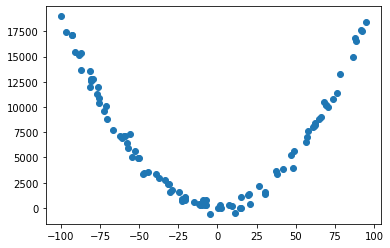

In [66]:
## 模拟测试数据
train_x = np.random.uniform(-100,100,100)
#print(x)
train_x = train_x.reshape(-1,1)
#print(train_x.shape)
#print(len(train_x))
## 生成噪声
noise = np.random.randn(100,1) * 500
# print("noise")
# print(noise)

W = np.array([[6],[2]])
b = 20
gen = LinearModel(W,b)
train_y = gen.forward(train_x) 
train_y = train_y + noise
train_y.shape



import matplotlib.pyplot as plt
plt.plot(train_x,train_y,'o')
plt.show()



In [140]:
##随机初始化参数




[[-10.4224155 ]
 [-26.18713403]]


In [90]:


W  = np.random.randn(2,1) * 5
print(W)

b = 18



# W = np.array([[5],[4]])
# b = 20

## 训练

lr  = 0.1
model = LinearModel(W,b)

print("loss is ",model.loss(train_x,train_y))

hw = np.zeros_like(W)
hb = 0   # ada
for i in range(1000):
    dw ,db  = model.backward(train_x,train_y)

    hw += dw * dw
    hb += db * db
    
#     W = W - dw * 0.00001
#     b = b - db * 0.00001
   
    
    
    model.W -= lr * dw / (np.sqrt(hw) + 1e-7)
    model.b -= lr * db / (np.sqrt(hb) + 1e-7)
    
    if i % 10 == 0:
       # print("b=%f, W=%f"%(b,W[0][0]))

        print("loss")
        print(model.loss(train_x,train_y))
        print("W:",model.W)
        print("b:",model.b)


print("===")
print(model.W)
print(model.b)
    




[[ 7.13360832]
 [-0.1330479 ]]
loss is  9365.236583547066
loss
8927.411051727826
W: [[ 7.03360832]
 [-0.0330479 ]]
b: 18.0999999999986
loss
7156.230316057543
W: [[6.63023353]
 [0.37167352]]
b: 18.504918136412492
loss
6214.479914956478
W: [[6.41669782]
 [0.58704494]]
b: 18.720557131047748
loss
5519.346325805143
W: [[6.25972247]
 [0.74614523]]
b: 18.879966643032848
loss
4959.622678748927
W: [[6.13387573]
 [0.87436775]]
b: 19.00853445357112
loss
4489.465467190362
W: [[6.02866988]
 [0.98218169]]
b: 19.116727092535886
loss
4084.56728471313
W: [[5.93854078]
 [1.07513925]]
b: 19.21009509280164
loss
3730.1410918134866
W: [[5.86010066]
 [1.15661919]]
b: 19.29201595472628
loss
3416.3598178926736
W: [[5.79109527]
 [1.22886803]]
b: 19.364735164212565
loss
3136.273328511372
W: [[5.72992765]
 [1.29347564]]
b: 19.42984167811777
loss
2884.732793277556
W: [[5.67541212]
 [1.35162085]]
b: 19.488513445062306
loss
2657.7840899853954
W: [[5.62663561]
 [1.40420991]]
b: 19.541655857457673
loss
2452.3021207923

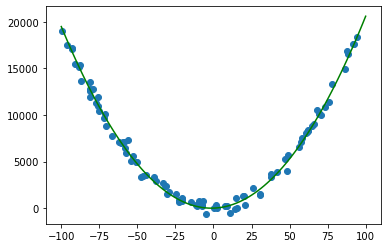

In [91]:
import matplotlib.pyplot as plt
plt.plot(train_x,train_y,'o')


test_x = np.linspace(-100, 100,100 ).reshape(100,1)

test_y = model.forward(test_x)

plt.plot(test_x,test_y,'g-')

plt.show()




2.0